In [25]:
import cv2
import numpy as np
import torch
torch.backends.cudnn.benchmark = True
import os
from helpers import get_driveable_mask2, get_driveable_mask
import matplotlib.pyplot as plt

# Read Image

<function matplotlib.pyplot.show(close=None, block=None)>

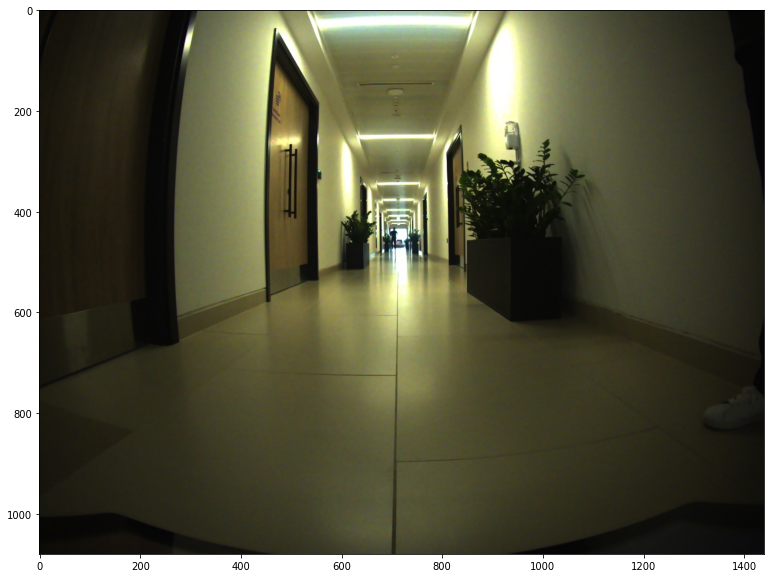

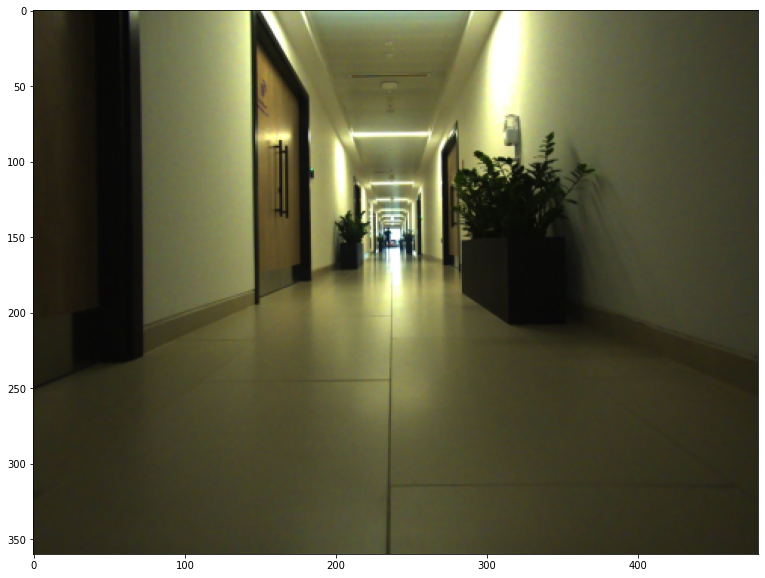

In [26]:
img_test = cv2.imread("./data/indoor1/left0004.jpg")

h,w,_ = img_test.shape
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB))
plt.show

# Undistort image
mtx = np.array([[847.788207, 0.000000, 718.645947],
[0.000000, 848.418915, 455.705157],
[0.000000, 0.000000, 1.000000]])

dist = np.array([[-0.332920, 0.089132, 0.001047, -0.002518, 0.000000]])

undistorted_image = cv2.undistort(img_test, mtx, dist, None, mtx)

img_size = (480, 360)

img_test = cv2.resize(undistorted_image, img_size, interpolation = cv2.INTER_AREA)
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB))
plt.show

# Warp Image
### Select src points in the image and compute transformation to birdeye view

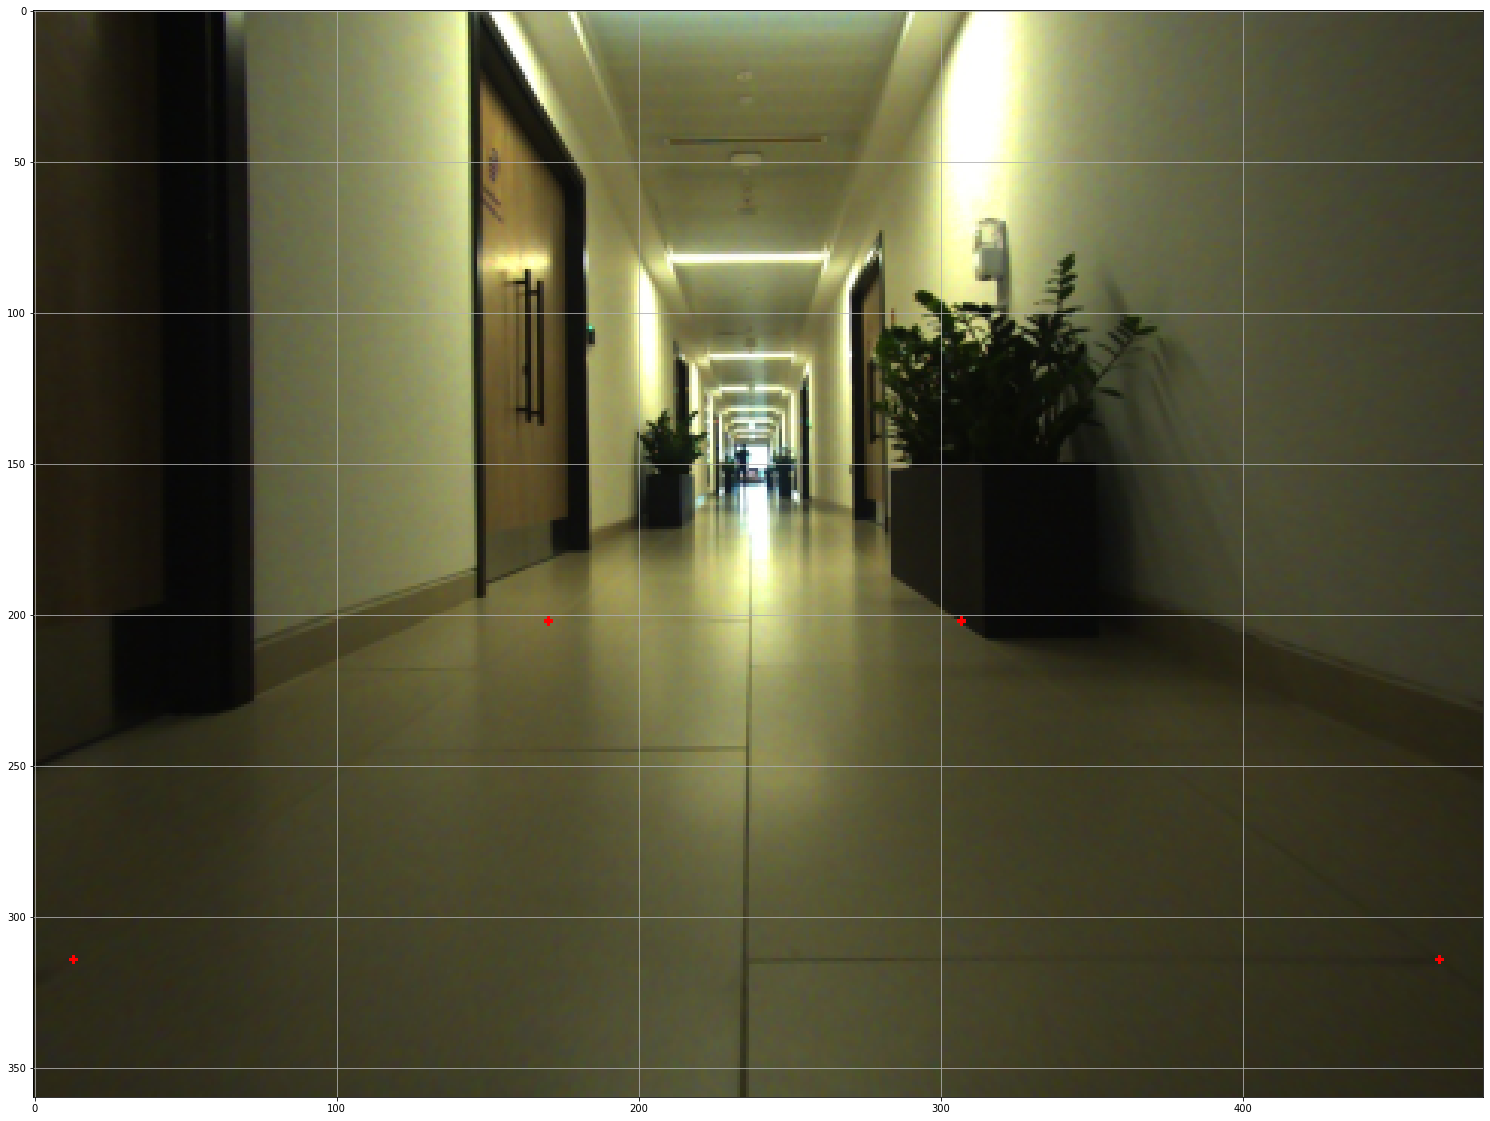

In [40]:
margin_h = 250
margin_h_bottom = 20

margin_w = 180
width = 480
height = 480
img_size = (width, height)

## These points would be normally found by extrinsic callibration (here they were chosen by just looking at the image)
src = np.float32([[170,202], [307,202],[465,314], [13, 314]])

dst = np.float32([[margin_w,margin_h],[width-margin_w,margin_h],[width-margin_w,height-margin_h_bottom],[margin_w,height-margin_h_bottom]])

# Show calibration points in image
# img = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB )
img = img_test.copy()
for point in src:
    cv2.circle(img,(int(point[0]),int(point[1])), 1, (0,0,255), -1)
    
fig, ax = plt.subplots(figsize=(40, 20))
ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB ))
ax.grid(True)
plt.show()

Testing on a different image


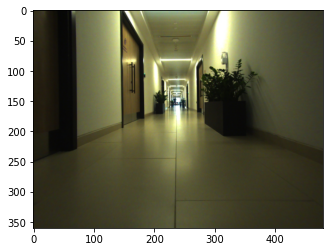

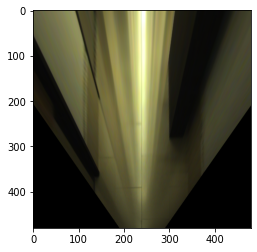

In [41]:
# Find transformation
M = cv2.getPerspectiveTransform(src, dst)
M_inv = cv2.getPerspectiveTransform(dst, src)

# Save Transforms
img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB )

np.savez('PerspectiveTransform.npz', M=M, M_inv=M_inv)
warped = cv2.warpPerspective(img_test, M, img_size, flags=cv2.INTER_LINEAR)
#Calculae pixel per meter
pixel_per_meter_x = (width - 2*margin_w)/2.0 #Horizontal distance between src points in the real world ( I assumed 4 meters)
pixel_per_meter_y = (height - (margin_h+margin_h_bottom))/4.0 #Vertical distance between src points in the real world ( I assumed 20 meters)

print("Testing on a different image")
plt.imshow(img_test)
plt.show()
plt.imshow(warped)
plt.show()

## Calculate some important parameters

In [24]:
print('pixel_per_meter_x: {}'.format(pixel_per_meter_x))
print('pixel_per_meter_y: {}'.format(pixel_per_meter_y))

pixel_per_meter_x: 60.0
pixel_per_meter_y: 90.0
